In [1]:
import numpy as np
import torch
from torch.nn import Module
from metrics.metrics import accuracy, MoRF, faithfulness, complexity
from loaders.mnist_loader import MNIST_data
import matplotlib.pyplot as plt
from models.mnist_cnn import CNN3b, CNN4b
from captum.attr import Saliency

In [2]:
print("CUDA Available: ",torch.cuda.is_available())
use_cuda=True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

CUDA Available:  True


In [3]:
loaders = MNIST_data()

In [14]:
bmodel0 = torch.load(r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\3b_cnn_adam_9628.pt")
bmodel0.eval()

CNN3b(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [15]:
model0 = torch.load(r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\3b_cnn_adam_fid_9684.pt")
model0.eval()

CNN3b(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [3]:
bmodel1 = torch.load(r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\\4b_cnn_adadelta_9881.pt")
bmodel1.eval()

CNN4b(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Flatten(start_dim=1, end_dim=-1)
  )
  (dense1): Sequential(
    (0): Linear(in_features=16384, out_features=128, bias=True)
  )
  (dense2): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [4]:
model1 = torch.load(r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\\4b_cnn_adadelta_fid_9518.pt")
model1.eval()

CNN4b(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Flatten(start_dim=1, end_dim=-1)
  )
  (dense1): Sequential(
    (0): Linear(in_features=16384, out_features=128, bias=True)
  )
  (dense2): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [5]:
perc = list(sorted(np.linspace(0, 100, num=10).astype(int), reverse=True))

In [6]:
accuracy(model0, loaders)

0.9684

In [7]:
accuracy(model1, loaders)

0.9518

In [17]:
bcorr0 = faithfulness(bmodel0, loaders, perc)

In [22]:
np.mean(bcorr0)

0.4264812329805759

In [23]:
np.mean(corr0)

0.5914468416869386

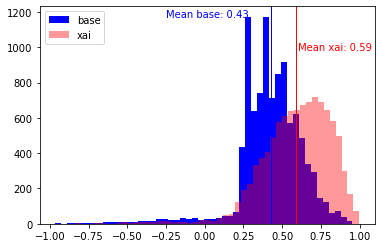

In [43]:
plt.hist(bcorr0, bins=50, label="base", color="blue")
plt.axvline(np.mean(bcorr0), linewidth=1,  color="blue")
min_ylim, max_ylim = plt.ylim()
plt.text(-0.25, max_ylim*0.95, 'Mean base: {:.2f}'.format(np.mean(bcorr0)), color="blue")
plt.hist(corr0, bins=50, alpha = 0.4, label="xai", color="red")
plt.axvline(np.mean(corr0), linewidth=1,  color="red")
min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(corr0)*1.02, max_ylim*0.8, 'Mean xai: {:.2f}'.format(np.mean(corr0)), color="red")
plt.legend(loc="upper left")
plt.savefig(r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\Faith_hist_fid_3b.png")
plt.show()

In [8]:
corr0 = faithfulness(model0, loaders, perc)

C:\Users\unknown\Anaconda3\envs\xai4uc3\lib\site-packages\captum\_utils\gradient.py:58: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index
C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\metrics\metrics.py:64: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  diffpred[j] = softm(model(images)).squeeze()[labels].item() - softm(model(maskpos*images)).squeeze()[labels].item()


In [13]:
corr1 = faithfulness(model1, loaders, perc)

(array([1.000e+00, 1.000e+00, 4.000e+00, 6.000e+00, 1.000e+00, 5.000e+00,
        2.300e+01, 2.100e+01, 4.200e+01, 4.100e+01, 2.800e+01, 3.700e+01,
        2.100e+01, 2.200e+01, 2.000e+01, 9.000e+00, 9.000e+00, 4.000e+00,
        5.000e+00, 1.000e+01, 6.000e+00, 4.000e+00, 5.000e+00, 6.000e+00,
        7.000e+00, 1.200e+01, 1.900e+01, 1.200e+01, 1.600e+01, 1.900e+01,
        2.200e+01, 3.300e+01, 5.600e+01, 6.700e+01, 9.300e+01, 1.480e+02,
        1.990e+02, 3.240e+02, 4.160e+02, 3.370e+02, 4.030e+02, 3.920e+02,
        3.820e+02, 5.130e+02, 5.080e+02, 7.460e+02, 1.933e+03, 2.306e+03,
        5.520e+02, 1.540e+02]),
 array([-0.67876057, -0.64533828, -0.61191599, -0.5784937 , -0.54507141,
        -0.51164912, -0.47822683, -0.44480454, -0.41138225, -0.37795996,
        -0.34453767, -0.31111538, -0.27769309, -0.2442708 , -0.21084851,
        -0.17742621, -0.14400392, -0.11058163, -0.07715934, -0.04373705,
        -0.01031476,  0.02310753,  0.05652982,  0.08995211,  0.1233744 ,
         0.

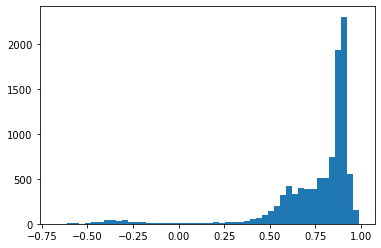

In [14]:
plt.hist(corr1, bins=50)

In [45]:
bcorr1 = faithfulness(bmodel1, loaders, perc)

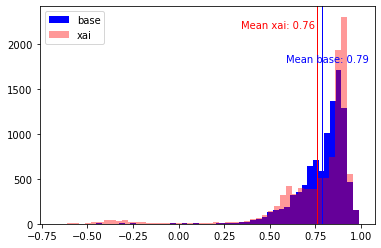

In [60]:
plt.hist(bcorr1, bins=50, label="base", color="blue")
plt.axvline(np.mean(bcorr1), linewidth=1,  color="blue")
min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(bcorr1)*0.75, max_ylim, 'Mean base: {:.2f}'.format(np.mean(bcorr1)), color="blue")
plt.hist(corr1, bins=50, alpha = 0.4, label="xai", color="red")
plt.axvline(np.mean(corr1), linewidth=1,  color="red")
min_ylim, max_ylim = plt.ylim()
plt.text(np.mean(corr1)*0.45, max_ylim*0.9, 'Mean xai: {:.2f}'.format(np.mean(corr1)), color="red")
plt.legend(loc="upper left")
plt.savefig(r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\Faith_hist_fid_4b.png")
plt.show()

(array([1.000e+00, 3.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 6.000e+00,
        1.000e+00, 4.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 1.000e+00,
        3.000e+00, 7.000e+00, 1.000e+01, 9.000e+00, 1.400e+01, 1.700e+01,
        1.900e+01, 4.100e+01, 5.500e+01, 8.000e+01, 1.270e+02, 1.560e+02,
        1.670e+02, 1.870e+02, 3.240e+02, 3.490e+02, 4.370e+02, 6.440e+02,
        7.060e+02, 5.860e+02, 1.008e+03, 1.370e+03, 1.709e+03, 1.295e+03,
        4.630e+02, 1.570e+02]),
 array([-0.57781125, -0.54648725, -0.51516326, -0.48383927, -0.45251528,
        -0.42119129, -0.38986729, -0.3585433 , -0.32721931, -0.29589532,
        -0.26457132, -0.23324733, -0.20192334, -0.17059935, -0.13927535,
        -0.10795136, -0.07662737, -0.04530338, -0.01397938,  0.01734461,
         0.0486686 ,  0.07999259,  0.11131659,  0.14264058,  0.17396457,
         0.

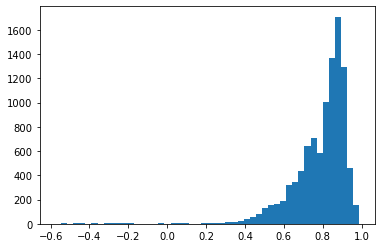

In [46]:
plt.hist(bcorr1, bins=50)

In [5]:
loaders = MNIST_data(test_batch_size = 2000)

In [18]:
bcomp0 = complexity(bmodel0, loaders)

In [19]:
bcomp0

4.314507961273193

In [16]:
comp0 = complexity(model0, loaders)

In [17]:
comp0

3.9860782623291016

In [7]:
comp1

4.102688789367676

In [8]:
bcomp1 = complexity(bmodel1, loaders)

In [9]:
bcomp1

4.195592880249023

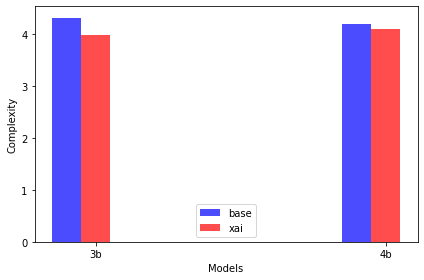

In [24]:
n_groups = 2
means_base = (bcomp0, bcomp1)
means_xai = (comp0, comp1)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.7

rects1 = plt.bar(index, means_base, bar_width,
alpha=opacity,
color='b',
label='base')

rects2 = plt.bar(index + bar_width, means_xai, bar_width,
alpha=opacity,
color='r',
label='xai')

plt.xlabel('Models')
plt.ylabel('Complexity')
#plt.title('Scores by person')
plt.xticks(index + bar_width, ('3b', '4b'))
plt.legend()

plt.tight_layout()
plt.savefig(r"C:\Users\unknown\Desktop\xai_projects\xai-learning-constraints\results\Complx_fid_base.png")
plt.show()